#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
#1) Delivery_time -> Predict delivery time using sorting time 

In [103]:
import pandas as pd
import seaborn as sns

In [104]:
df=pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [105]:
#EDA and Data visualisation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [106]:
# CHECKING FOR MISSING VALUES
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

C:\Users\Swetha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

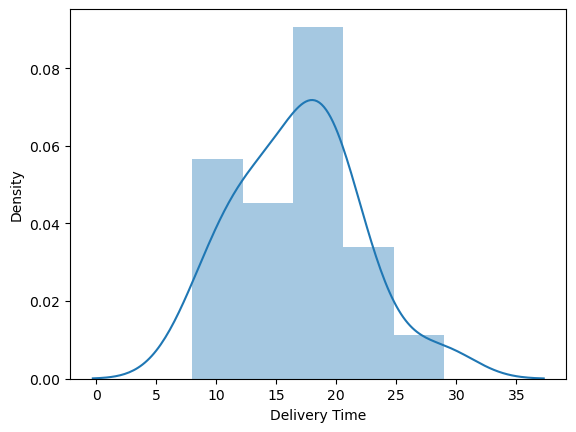

In [94]:
sns.distplot(df["Delivery Time"])

C:\Users\Swetha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

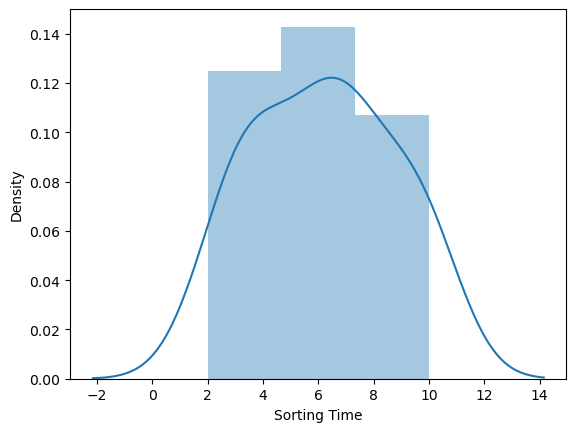

In [95]:
sns.distplot(df["Sorting Time"])

In [111]:
# Renaming Columns
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [112]:
# correlation MATRIX
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [164]:
# Model Building
import statsmodels.formula.api as smf 
model = smf.ols('delivery_time~sorting_time',data=df).fit()

In [117]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        00:19:09   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

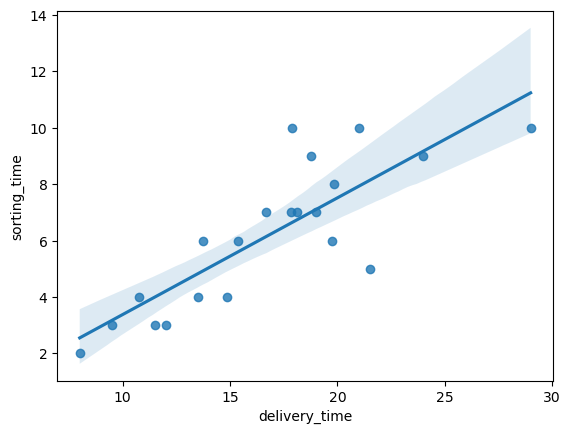

In [165]:
sns.regplot(x=df["delivery_time"],y=df["sorting_time"])

In [166]:
#Coefficients
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [167]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [168]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

#predict New data

In [169]:
newdata=pd.Series([5,8])  
newdata

0    5
1    8
dtype: int64

In [170]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])  
data_pred

,sorting_time
0,5
1,8


In [171]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
#2) Salary_hike -> Build a prediction model for Salary_hike

In [132]:
sd=pd.read_csv("Salary_Data.csv")
sd

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [133]:
sd.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [134]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Text(0, 0.5, 'Salary')

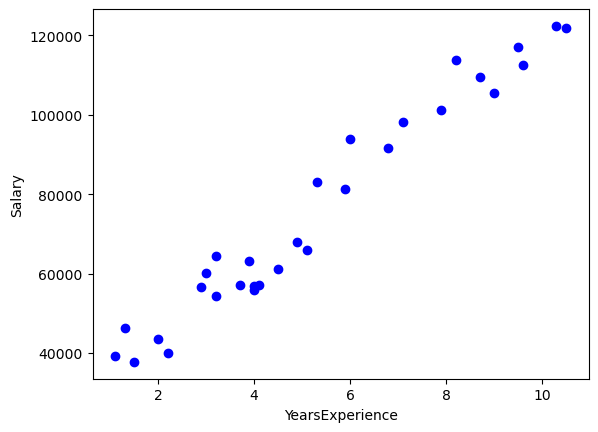

In [138]:
import matplotlib.pyplot as plt
plt.plot(sd.YearsExperience,sd.Salary, "bo") 
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

# Correlation

In [139]:
sd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [140]:
sd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


C:\Users\Swetha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

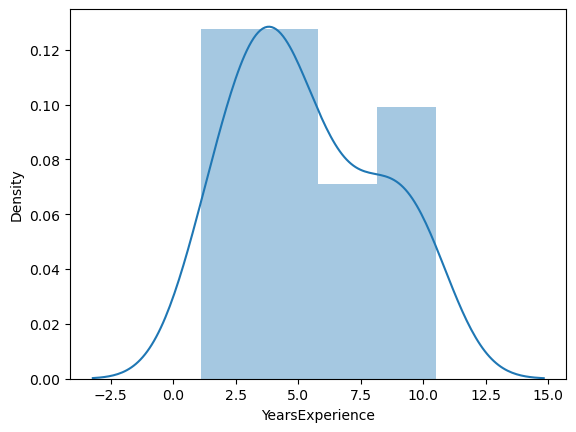

In [141]:
import seaborn as sns
sns.distplot(sd['YearsExperience'])

C:\Users\Swetha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

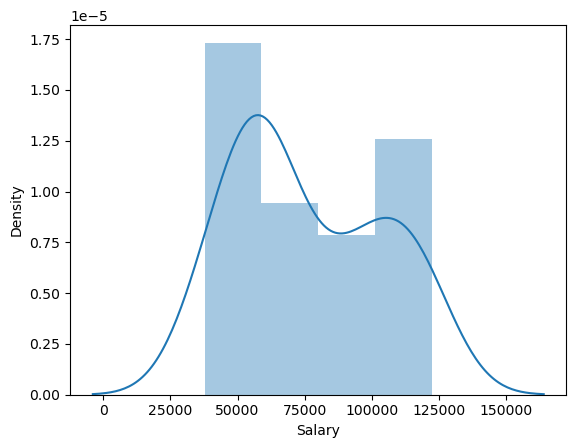

In [142]:
sns.distplot(sd['Salary'])

# Fitting Linear Regression Model

In [144]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = sd).fit() 

In [145]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        00:43:05   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

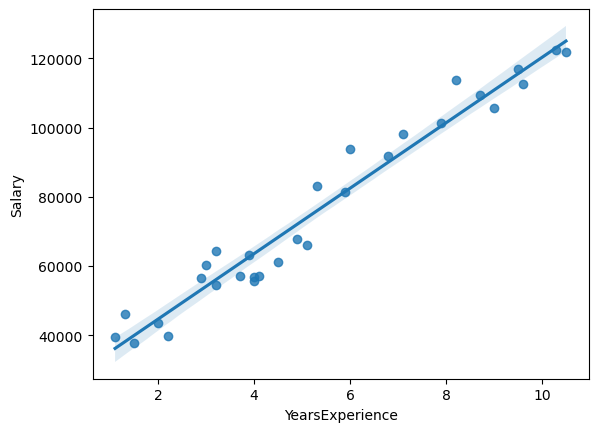

In [146]:
sns.regplot(x="YearsExperience", y="Salary", data=sd);

In [147]:
#Coefficients
model.params 

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [148]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues) 

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [149]:
#R squared values
(model.rsquared,model.rsquared_adj) 

(0.9569566641435086, 0.9554194021486339)

# Model Prediction for salary hike

In [150]:
# Manual prediction for say 3 Years Experience, prediction=intercept+slope*independent variable
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [153]:
# Automatic Prediction for say 3 & 5 Years Experience 
newdata1=pd.Series([3,5])
newdata1

0    3
1    5
dtype: int64

In [155]:
datapred=pd.DataFrame(newdata1,columns=['YearsExperience'])
datapred

,YearsExperience
0,3
1,5


In [156]:
model.predict(datapred)

0    54142.087163
1    73042.011806
dtype: float64